<a href="https://colab.research.google.com/github/OsloG3/Persistent-Homology-From-Scratch/blob/main/Finnal_Project_OsloGradenghi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.cluster import KMeans

In [ ]:
# Importing the datasets
male_stud = pd.read_csv('data/male_stud.csv')
male_stud.head()

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade
0,0,1,1,2,0,1,1,1,0,5,4,2,10,15
1,0,1,1,2,0,0,0,1,0,4,4,4,0,11
2,0,1,1,2,0,1,0,1,0,4,2,2,0,19
3,1,1,1,2,0,1,1,1,0,5,5,1,0,15
4,0,1,1,1,0,1,1,1,0,4,3,3,2,14


In [ ]:
print(male_stud.shape)

(187, 14)


In [ ]:
male_stud.isna().sum()

large_family     0
lives_in_city    0
traveltime       0
studytime        0
failures         0
paid             0
activities       0
internet         0
romantic         0
famrel           0
freetime         0
goout            0
absences         0
final_grade      0
dtype: int64

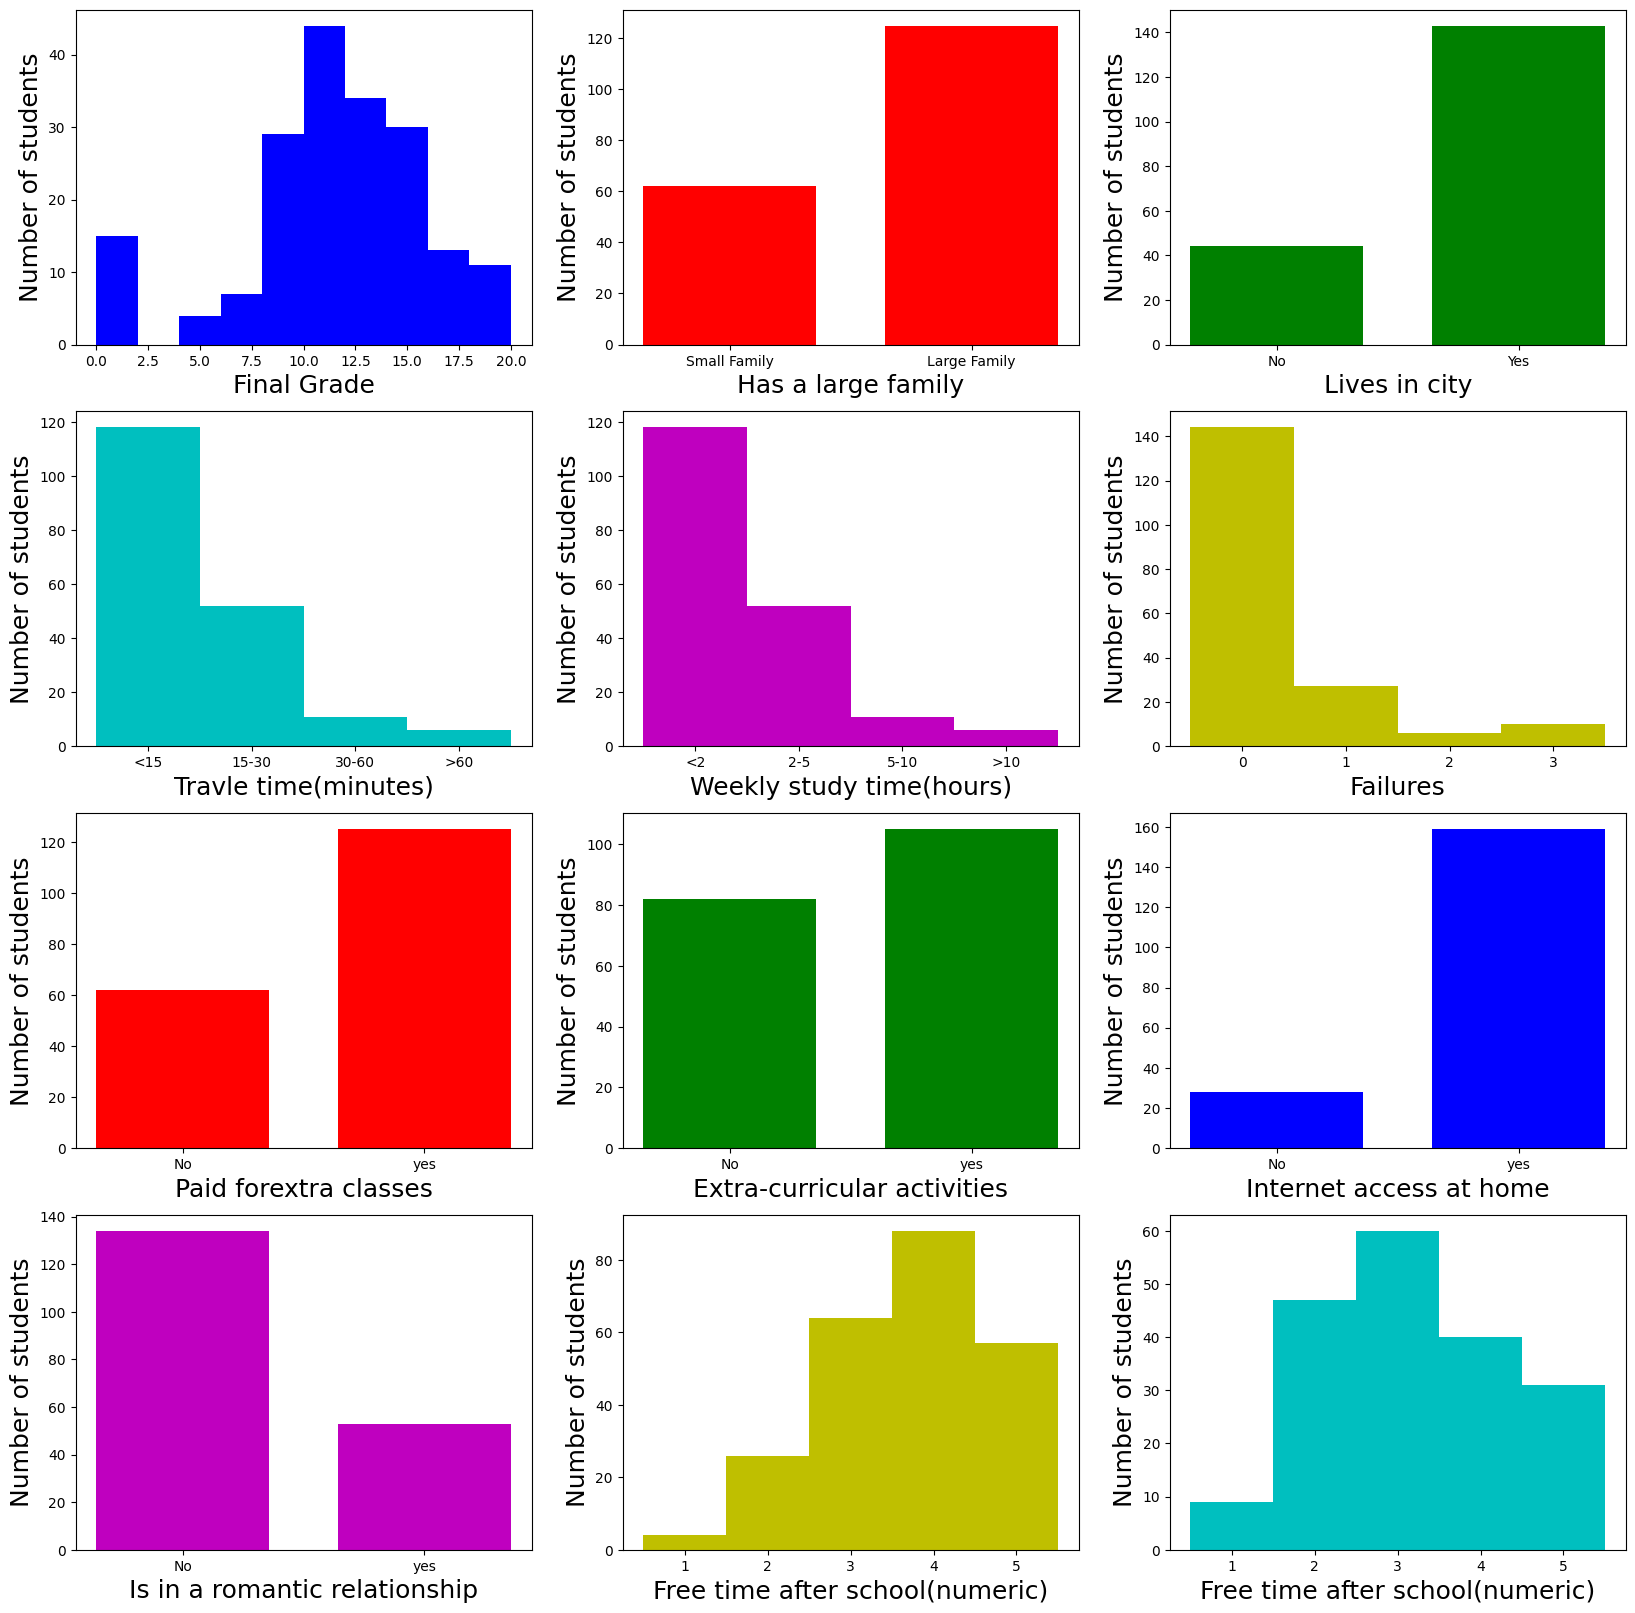

In [ ]:
# Perform an exploratory data analysis, creating both numerical and graphical summaries of male_stud

# Numerical summaries
#print(male_stud.describe())
fig = plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
plt.hist(male_stud.final_grade, color='b', bins=10)
plt.xlabel('Final Grade',size=18)
plt.ylabel('Number of students',size=18)

plt.subplot(4,3,2)
plt.hist(male_stud.large_family, color='r', bins=[-0.1,0.4,0.6, 1.1])
plt.xlabel('Has a large family',size=18)
plt.ylabel('Number of students',size=18)
plt.xticks([0.15,0.85], ['Small Family', 'Large Family'])

plt.subplot(4,3,3)
plt.hist(male_stud.lives_in_city, color='g', bins=[-0.1,0.4,0.6, 1.1])
plt.xlabel('Lives in city',size=18)
plt.ylabel('Number of students',size=18)
plt.xticks([0.15,0.85], ['No', 'Yes'])

#(numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
plt.subplot(4,3,4)
plt.hist(male_stud.traveltime, color='c', bins=[1,2,3,4,5])
plt.xlabel('Travle time(minutes)',size=18)
plt.ylabel('Number of students',size=18)
plt.xticks([1.5,2.5,3.5, 4.5], ['<15', '15-30', '30-60', '>60'])

#(numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
plt.subplot(4,3,5)
plt.hist(male_stud.traveltime, color='m', bins=[1,2,3,4,5])
plt.xlabel('Weekly study time(hours)',size=18)
plt.ylabel('Number of students',size=18)
plt.xticks([1.5,2.5,3.5, 4.5], ['<2', '2-5', '5-10', '>10'])

plt.subplot(4,3,6)
plt.hist(male_stud.failures, color='y', bins=[0,1,2,3,4])
plt.xlabel('Failures',size=18)
plt.ylabel('Number of students',size=18)
plt.xticks([0.5, 1.5, 2.5, 3.5], ['0', '1', '2', '3'])

plt.subplot(4,3,7)
plt.hist(male_stud.large_family, color='r', bins=[-0.1,0.4,0.6, 1.1])
plt.xlabel('Paid forextra classes',size=18)
plt.ylabel('Number of students',size=18)
plt.xticks([0.15,0.85], ['No', 'yes'])

plt.subplot(4,3,8)
plt.hist(male_stud.activities, color='g', bins=[-0.1,0.4,0.6, 1.1])
plt.xlabel('Extra-curricular activities',size=18)
plt.ylabel('Number of students',size=18)
plt.xticks([0.15,0.85], ['No', 'yes'])

plt.subplot(4,3,9)
plt.hist(male_stud.internet, color='b', bins=[-0.1,0.4,0.6, 1.1])
plt.xlabel('Internet access at home',size=18)
plt.ylabel('Number of students',size=18)
plt.xticks([0.15,0.85], ['No', 'yes'])

plt.subplot(4,3,10)
plt.hist(male_stud.romantic, color='m', bins=[-0.1,0.4,0.6, 1.1])
plt.xlabel('Is in a romantic relationship',size=18)
plt.ylabel('Number of students',size=18)
plt.xticks([0.15,0.85], ['No', 'yes'])

plt.subplot(4,3,11)
plt.hist(male_stud.famrel, color='y', bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.xlabel('Quality of family relationships',size=18)
plt.ylabel('Number of students',size=18)
plt.xticks([1,2,3,4,5])

plt.subplot(4,3,11)
plt.hist(male_stud.freetime, color='y', bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.xlabel('Free time after school(numeric)',size=18)
plt.ylabel('Number of students',size=18)
plt.xticks([1,2,3,4,5])

plt.subplot(4,3,12)
plt.hist(male_stud.goout, color='c', bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.xlabel('Free time after school(numeric)',size=18)
plt.ylabel('Number of students',size=18)
plt.xticks([1,2,3,4,5])

plt.show()

In [ ]:
print(male_stud.isna().sum())

large_family     0
lives_in_city    0
traveltime       0
studytime        0
failures         0
paid             0
activities       0
internet         0
romantic         0
famrel           0
freetime         0
goout            0
absences         0
final_grade      0
dtype: int64


In [ ]:
# Importing the datasets
female_stud = pd.read_csv('data/female_stud.csv')
female_stud.head()

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade
0,1,1,2,2,0,0,0,0,0,4,3,4,6,6
1,1,1,1,2,0,0,0,1,0,5,3,3,4,6
2,0,1,1,2,3,1,0,1,0,4,3,2,10,10
3,1,1,1,3,0,1,1,1,1,3,2,2,2,15
4,1,1,1,2,0,1,0,0,0,4,3,2,4,10


In [ ]:
print(female_stud.shape)

(208, 14)


In [ ]:
female_stud.tail()

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade
203,1,0,2,3,0,1,0,0,0,5,3,3,2,10
204,1,0,3,1,0,1,1,1,1,4,4,3,7,6
205,1,0,1,3,1,0,1,1,0,5,4,2,0,0
206,0,1,1,2,0,1,0,1,0,4,3,4,0,8
207,1,1,2,2,1,0,1,0,0,1,1,1,0,0


In [ ]:
female_stud.isna().sum()

large_family     0
lives_in_city    0
traveltime       0
studytime        0
failures         0
paid             0
activities       0
internet         0
romantic         0
famrel           0
freetime         0
goout            0
absences         0
final_grade      0
dtype: int64

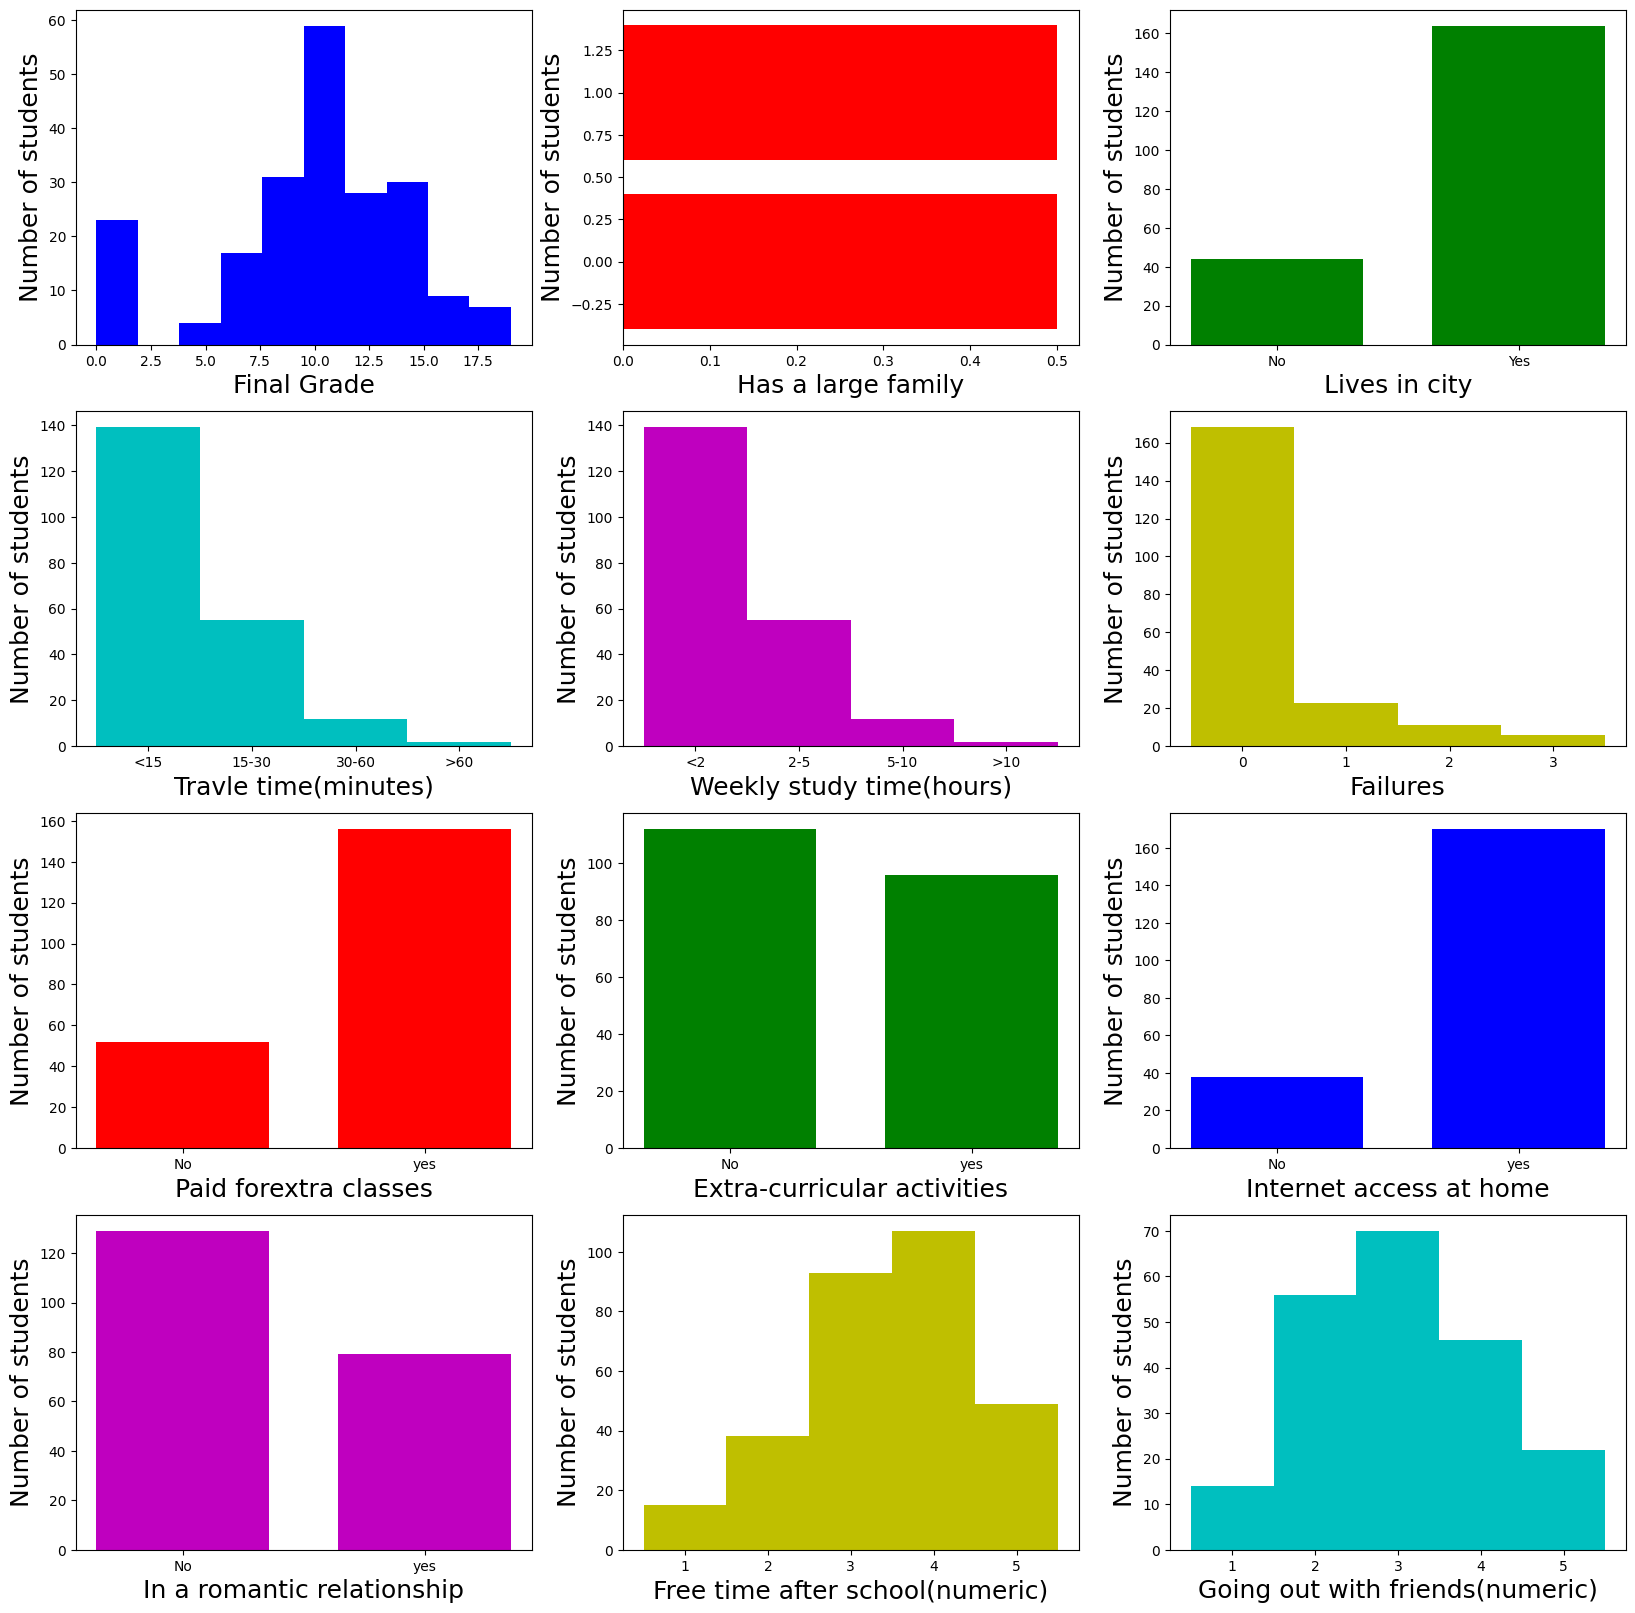

In [ ]:

fig = plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
plt.hist(female_stud.final_grade, color='b', bins=10)
plt.xlabel('Final Grade',size=18)
plt.ylabel('Number of students',size=18)

plt.subplot(4,3,2)
#plt.hist(female_stud.large_family, color='r', bins=[-0.1,0.4,0.6, 1.1])
plt.barh(female_stud.large_family, 0.5, color='r')
plt.xlabel('Has a large family',size=18)
plt.ylabel('Number of students',size=18)
#plt.xticks([0.15,0.85], ['Small Family', 'Large Family'])

plt.subplot(4,3,3)
plt.hist(female_stud.lives_in_city, color='g', bins=[-0.1,0.4,0.6, 1.1])
plt.xlabel('Lives in city',size=18)
plt.ylabel('Number of students',size=18)
plt.xticks([0.15,0.85], ['No', 'Yes'])

#(numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
plt.subplot(4,3,4)
plt.hist(female_stud.traveltime, color='c', bins=[1,2,3,4,5])
plt.xlabel('Travle time(minutes)',size=18)
plt.ylabel('Number of students',size=18)
plt.xticks([1.5,2.5,3.5, 4.5], ['<15', '15-30', '30-60', '>60'])

#(numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
plt.subplot(4,3,5)
plt.hist(female_stud.traveltime, color='m', bins=[1,2,3,4,5])
plt.xlabel('Weekly study time(hours)',size=18)
plt.ylabel('Number of students',size=18)
plt.xticks([1.5,2.5,3.5, 4.5], ['<2', '2-5', '5-10', '>10'])

plt.subplot(4,3,6)
plt.hist(female_stud.failures, color='y', bins=[0,1,2,3,4])
plt.xlabel('Failures',size=18)
plt.ylabel('Number of students',size=18)
plt.xticks([0.5, 1.5, 2.5, 3.5], ['0', '1', '2', '3'])

plt.subplot(4,3,7)
plt.hist(female_stud.large_family, color='r', bins=[-0.1,0.4,0.6, 1.1])
plt.xlabel('Paid forextra classes',size=18)
plt.ylabel('Number of students',size=18)
plt.xticks([0.15,0.85], ['No', 'yes'])

plt.subplot(4,3,8)
plt.hist(female_stud.activities, color='g', bins=[-0.1,0.4,0.6, 1.1])
plt.xlabel('Extra-curricular activities',size=18)
plt.ylabel('Number of students',size=18)
plt.xticks([0.15,0.85], ['No', 'yes'])

plt.subplot(4,3,9)
plt.hist(female_stud.internet, color='b', bins=[-0.1,0.4,0.6, 1.1])
plt.xlabel('Internet access at home',size=18)
plt.ylabel('Number of students',size=18)
plt.xticks([0.15,0.85], ['No', 'yes'])

plt.subplot(4,3,10)
plt.hist(female_stud.romantic, color='m', bins=[-0.1,0.4,0.6, 1.1])
plt.xlabel('In a romantic relationship',size=18)
plt.ylabel('Number of students',size=18)
plt.xticks([0.15,0.85], ['No', 'yes'])

plt.subplot(4,3,11)
plt.hist(female_stud.famrel, color='y', bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.xlabel('Quality of family relationships',size=18)
plt.ylabel('Number of students',size=18)
plt.xticks([1,2,3,4,5])

plt.subplot(4,3,11)
plt.hist(female_stud.freetime, color='y', bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.xlabel('Free time after school(numeric)',size=18)
plt.ylabel('Number of students',size=18)
plt.xticks([1,2,3,4,5])

plt.subplot(4,3,12)
plt.hist(female_stud.goout, color='c', bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.xlabel('Going out with friends(numeric)',size=18)
plt.ylabel('Number of students',size=18)
plt.xticks([1,2,3,4,5])

plt.show()

In [ ]:
# Concatenate male_stud and female_stud into a single dataframe in sequence

all_stud = pd.concat([male_stud, female_stud]).reset_index(drop=True)

# Print the combined dataframe
all_stud.tail()

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade
390,1,0,2,3,0,1,0,0,0,5,3,3,2,10
391,1,0,3,1,0,1,1,1,1,4,4,3,7,6
392,1,0,1,3,1,0,1,1,0,5,4,2,0,0
393,0,1,1,2,0,1,0,1,0,4,3,4,0,8
394,1,1,2,2,1,0,1,0,0,1,1,1,0,0


In [ ]:
correlation_matrix = all_stud.corr()

# Find the indicators that are most correlated
most_correlated = correlation_matrix.abs().unstack().sort_values(ascending=False)[15::2]

# Print the most correlated indicators
most_correlated

failures       final_grade      0.360415
lives_in_city  traveltime       0.328096
freetime       goout            0.285019
internet       lives_in_city    0.216842
failures       paid             0.188039
                                  ...   
romantic       paid             0.005536
               lives_in_city    0.005257
internet       large_family     0.000720
paid           famrel           0.000460
activities     large_family     0.000113
Length: 91, dtype: float64

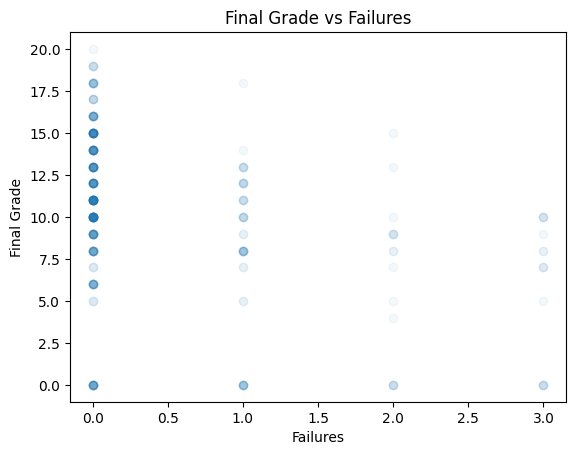

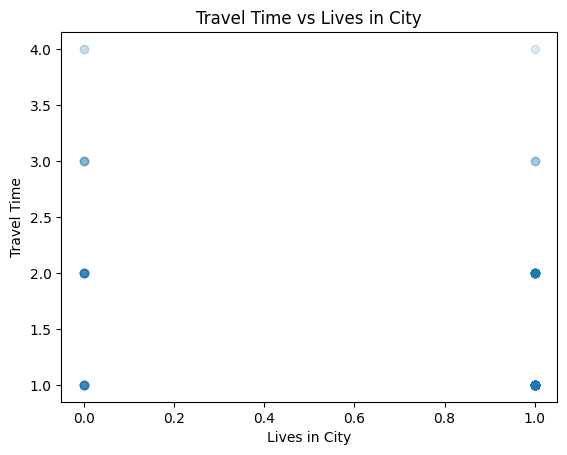

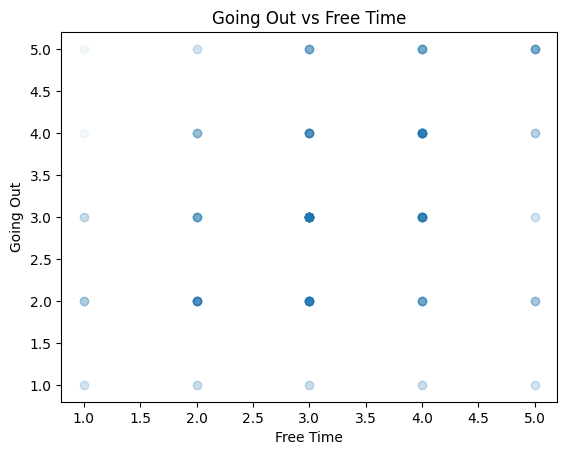

In [ ]:
# Scatterplot of final_grade vs failures

plt.scatter(all_stud.failures, all_stud.final_grade, alpha=0.05)
plt.xlabel('Failures')
plt.ylabel('Final Grade')
plt.title('Final Grade vs Failures')
plt.show()

# Scatterplot of traveltime vs lives_in_city

plt.scatter(all_stud.lives_in_city, all_stud.traveltime, alpha=0.05)
plt.xlabel('Lives in City')
plt.ylabel('Travel Time')
plt.title('Travel Time vs Lives in City')
plt.show()

# Scatterplot of goout vs freetime

plt.scatter(all_stud.freetime, all_stud.goout, alpha=0.05)
plt.xlabel('Free Time')
plt.ylabel('Going Out')
plt.title('Going Out vs Free Time')
plt.show()

In [ ]:
# Add a new column 'pass_fail' to the dataframe 'all_stud' indicating whether the student passed or failed

all_stud['pass_fail'] = all_stud['final_grade'].apply(lambda x: 1 if x >= 10 else 0)

all_stud.tail()

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade,pass_fail
390,1,0,2,3,0,1,0,0,0,5,3,3,2,10,1
391,1,0,3,1,0,1,1,1,1,4,4,3,7,6,0
392,1,0,1,3,1,0,1,1,0,5,4,2,0,0,0
393,0,1,1,2,0,1,0,1,0,4,3,4,0,8,0
394,1,1,2,2,1,0,1,0,0,1,1,1,0,0,0


In [ ]:
# Creating the series 'y' with the 'pass_fail' column
y = all_stud['pass_fail']

# Creating the dataset 'X' with all the other variables except 'final_grade'
X_raw = all_stud.drop(['final_grade', 'pass_fail'], axis=1)
X = (X_raw - X_raw.mean())/X_raw.std()
X.head()

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences
0,-1.568015,0.534714,-0.642435,-0.042232,-0.449374,1.085968,0.981188,0.447325,-0.707552,1.177367,0.765428,-0.996032,0.536185
1,-1.568015,0.534714,-0.642435,-0.042232,-0.449374,-0.918506,-1.016592,0.447325,-0.707552,0.062115,0.765428,0.800464,-0.713332
2,-1.568015,0.534714,-0.642435,-0.042232,-0.449374,1.085968,-1.016592,0.447325,-0.707552,0.062115,-1.236851,-0.996032,-0.713332
3,0.636134,0.534714,-0.642435,-0.042232,-0.449374,1.085968,0.981188,0.447325,-0.707552,1.177367,1.766567,-1.894280,-0.713332
4,-1.568015,0.534714,-0.642435,-1.233786,-0.449374,1.085968,0.981188,0.447325,-0.707552,0.062115,-0.235711,-0.097784,-0.463428


In [ ]:
# Creating the series 'y' with the 'pass_fail' column
y = all_stud['pass_fail']

# Creating the dataset 'X' with all the other variables except 'final_grade'
X = all_stud.drop(['final_grade', 'pass_fail'], axis=1)
X.insert(0,'intercept',1)

In [ ]:
X.head()

,intercept,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences
0,1,0,1,1,2,0,1,1,1,0,5,4,2,10
1,1,0,1,1,2,0,0,0,1,0,4,4,4,0
2,1,0,1,1,2,0,1,0,1,0,4,2,2,0
3,1,1,1,1,2,0,1,1,1,0,5,5,1,0
4,1,0,1,1,1,0,1,1,1,0,4,3,3,2


In [ ]:
X.columns

Index(['intercept', 'large_family', 'lives_in_city', 'traveltime', 'studytime',
       'failures', 'paid', 'activities', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'absences'],
      dtype='object')

In [ ]:
def max_aic(y, X):
    v = [0]
    col = list(range(len(X.columns)))
    mod = sm.Logit(y,X[['intercept']])
    res = mod.fit(disp=0)
    current_aic = res.aic
    col.pop(col.index(0))

    while(len(col) > 0):
        imp = False
        best_aic = current_aic
        best_col = 0
        for i in col:
            mod = sm.Logit(y,X.iloc[:,v+[i]])
            res = mod.fit(disp=0)
            aic =res.aic
            if (aic < best_aic and aic < current_aic):
                imp = True
                best_aic = aic
                best_col = i
        if (imp):
            v.append(best_col)
            current_aic = best_aic
            col.pop(col.index(best_col))
        else:
            return (v, best_aic)

In [ ]:
cols, aics = max_aic(y, X)

In [ ]:
X.columns[cols]

Index(['intercept', 'failures', 'goout'], dtype='object')

In [ ]:
y = Series(all_stud.final_grade)

# Creating the dataset 'X' with all the other variables except 'final_grade'
X = all_stud.drop(['final_grade', 'pass_fail'], axis=1)

In [ ]:
train_size = 300
np.random.seed(123)

train_select = np.random.permutation(range(y.shape[0]))
X_train = X.iloc[train_select[:train_size],:].reset_index(drop=True)
X_test = X.iloc[train_select[train_size:],:].reset_index(drop=True)
y_train = y[train_select[:train_size]].reset_index(drop=True)
y_test = y[train_select[train_size:]].reset_index(drop=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=101)
rf.fit(X_train, y_train)
rf_test_pred = rf.predict(X_test)
RSS_rf = np.mean(pow((rf_test_pred - y_test),2))
print(RSS_rf)

#fig = plt.figure()
#plt.plot(y_test,rf_test_pred,'kx')
#plt.plot([0,20], [0,20], ls="--", color='r')

17.879526270438


In [ ]:
X.columns[rf.feature_importances_.argsort()[::-1]]

Index(['absences', 'failures', 'goout', 'freetime', 'famrel', 'studytime',
       'traveltime', 'romantic', 'paid', 'activities', 'large_family',
       'internet', 'lives_in_city'],
      dtype='object')

In [ ]:
n_trees = [5, 10, 50, 100, 500, 1000, 5000]
for n in [5]:
    RSS_rf = 0
    for i in range(20):
        rf = RandomForestRegressor(n_estimators=n, random_state=(i+20))
        rf.fit(X_train, y_train)
        rf_test_pred = rf.predict(X_test)
        RSS_rf += np.mean(pow((rf_test_pred - y_test),2))
    RSS_rf /= 20
    print("For ", n, " trees, the model's mean square error is", RSS_rf)

For  5  trees, the model's mean square error is 19.999672001432153


For  1  trees, the model's score is -5121.999999999999
For  2  trees, the model's score is -4666.594768076953
For  3  trees, the model's score is -4327.676736416098
For  4  trees, the model's score is -4074.0757853885307
For  5  trees, the model's score is -3819.995146404479
For  6  trees, the model's score is -3693.954678795184
For  7  trees, the model's score is -3467.3892656406033
For  8  trees, the model's score is -3399.1908943553217
For  9  trees, the model's score is -3297.473999839124
For  10  trees, the model's score is -3205.7784351547616


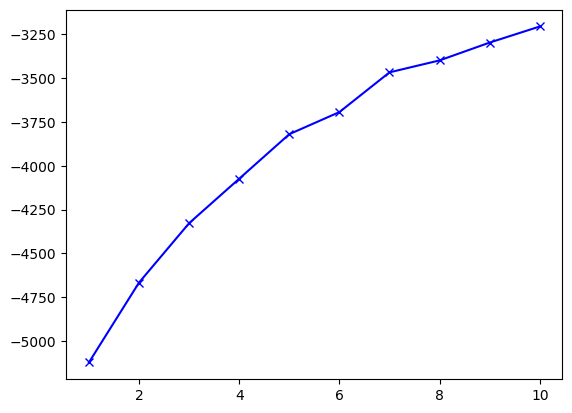

In [ ]:
scores = np.array([])
X_raw = all_stud.drop(['final_grade', 'pass_fail'], axis=1)
X = (X_raw - X_raw.mean())/X_raw.std()
for i in range(1,11):
    model = KMeans(n_clusters=i, n_init=10)
    model.fit(X)
    scores = np.append(scores, model.score(X))
    print("For ", i, " trees, the model's score is", scores[i-1])

plt.plot(np.linspace(1, 10, 10), scores, "bx-")

In [ ]:
model = KMeans(n_clusters=6, n_init=10)
model.fit(X)
preds = model.predict(X)

X_grouped = X.groupby(preds)

In [ ]:
X_grouped.get_group(0)['absences']

1      0
2      0
3      0
4      2
5      2
      ..
390    2
391    7
392    0
393    0
394    0
Name: absences, Length: 309, dtype: int64

In [ ]:
np.unique(preds)

array([0, 1, 2, 3, 4, 5], dtype=int32)

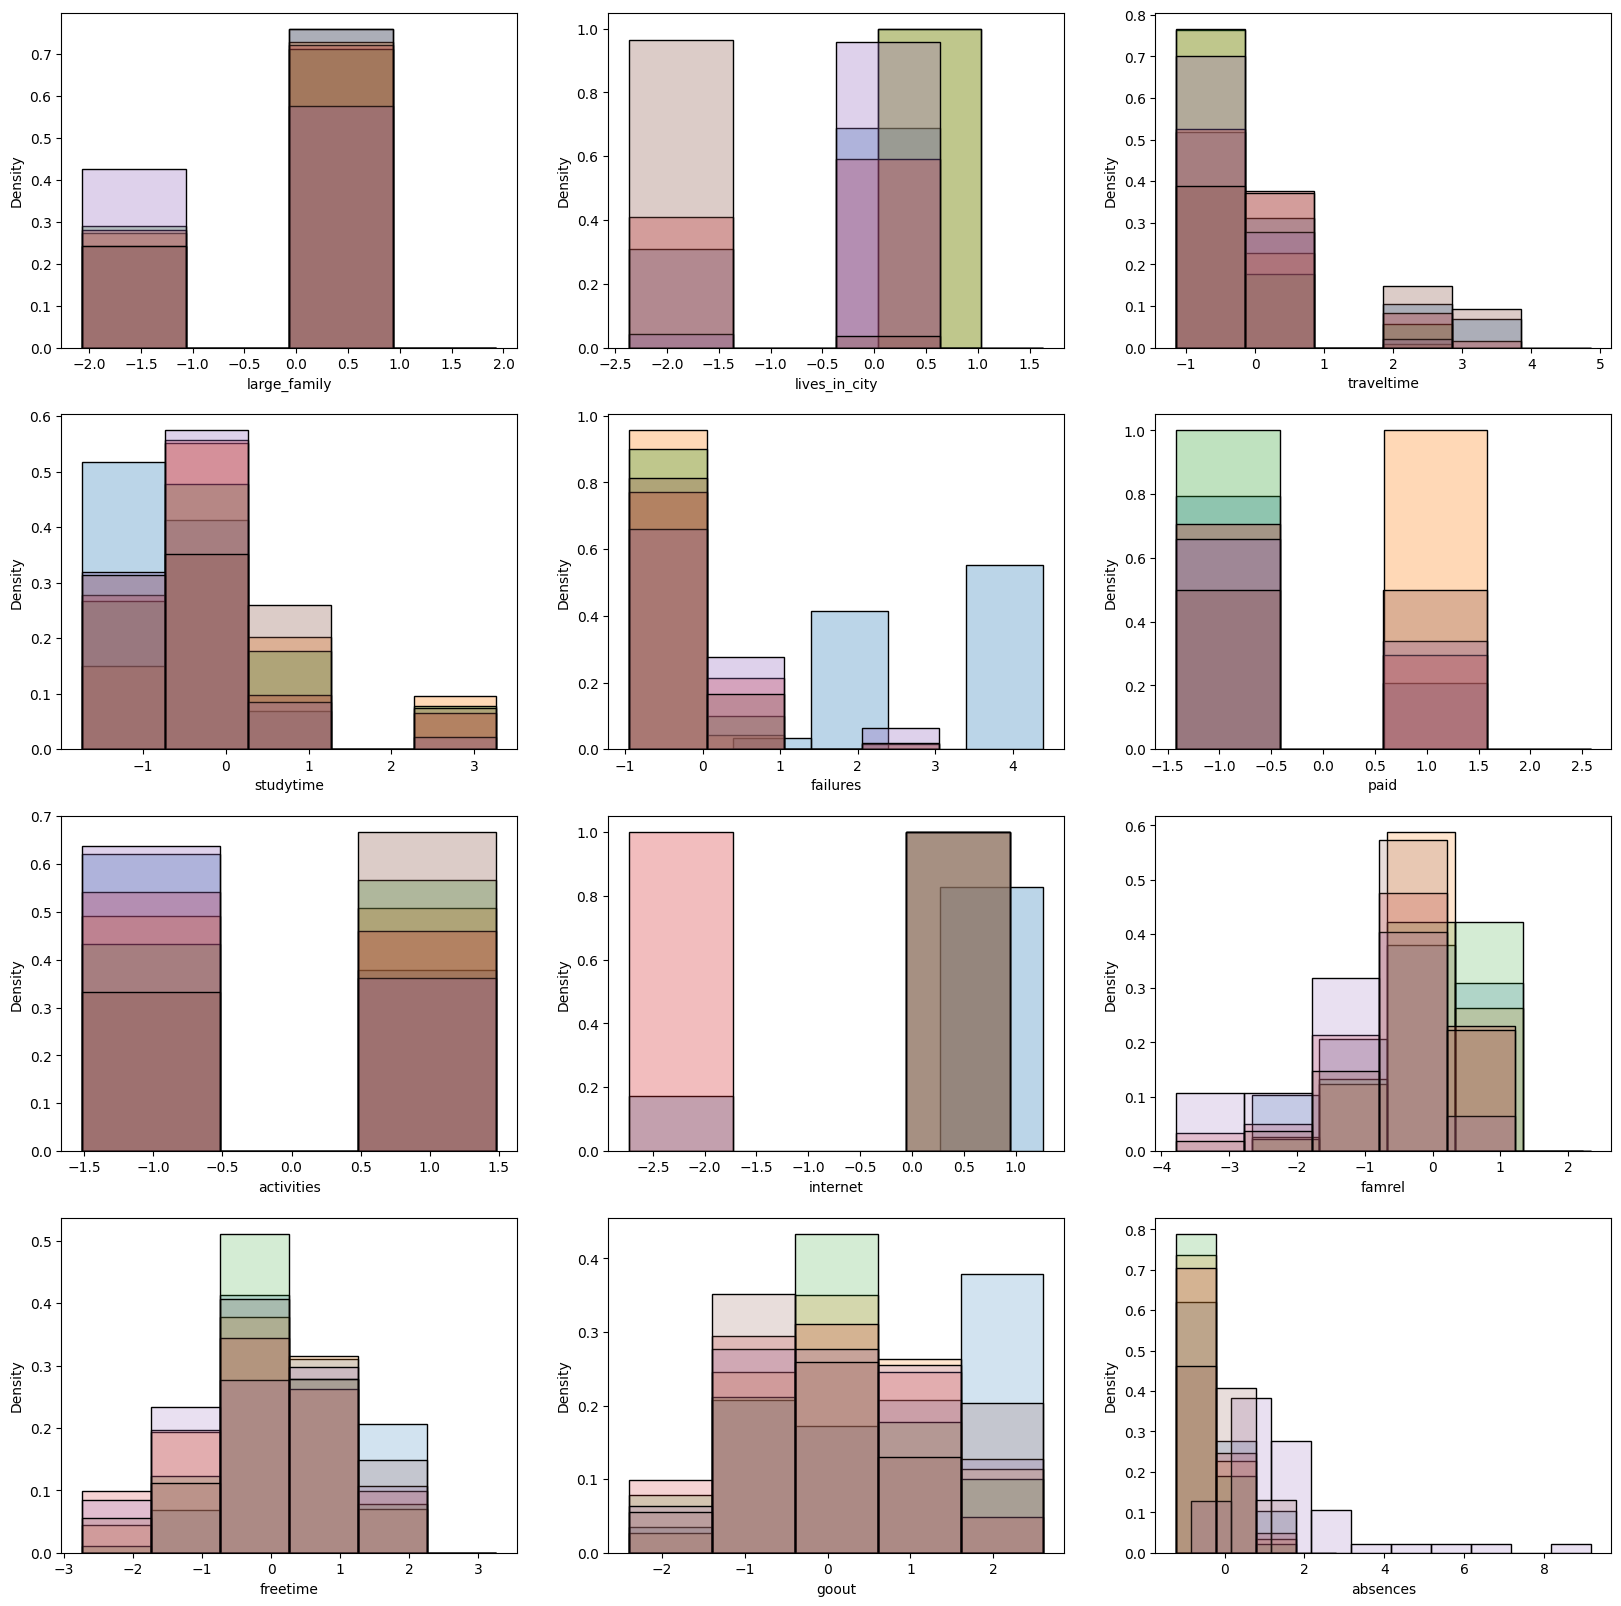

In [ ]:
#sns.histplot(data=x_grouped.get_group(0), x='absences', color=y, label="Sepal Length")
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(20,20))
for i in range(6):
    sns.histplot(x=X_grouped.get_group(i)['large_family'], alpha=0.3, stat="density", ax=axs[0][0], discrete=True)
    sns.histplot(x=X_grouped.get_group(i)['lives_in_city'], alpha=0.3, stat="density", ax=axs[0][1], discrete=True)
    sns.histplot(x=X_grouped.get_group(i)['traveltime'], alpha=0.3, stat="density", ax=axs[0][2], discrete=True)
    sns.histplot(x=X_grouped.get_group(i)['studytime'], alpha=0.3, stat="density", ax=axs[1][0], discrete=True)
    sns.histplot(x=X_grouped.get_group(i)['failures'], alpha=0.3, stat="density", ax=axs[1][1], discrete=True)
    sns.histplot(x=X_grouped.get_group(i)['paid'], alpha=0.3, stat="density", ax=axs[1][2], discrete=True)
    sns.histplot(x=X_grouped.get_group(i)['activities'], alpha=0.3, stat="density", ax=axs[2][0], discrete=True)
    sns.histplot(x=X_grouped.get_group(i)['internet'], alpha=0.3, stat="density", ax=axs[2][1], discrete=True)
    sns.histplot(x=X_grouped.get_group(i)['famrel'], alpha=0.2, stat="density", ax=axs[2][2], discrete=True)
    sns.histplot(x=X_grouped.get_group(i)['freetime'], alpha=0.2, stat="density", ax=axs[3][0], discrete=True)
    sns.histplot(x=X_grouped.get_group(i)['goout'], alpha=0.2, stat="density", ax=axs[3][1], discrete=True)
    sns.histplot(x=X_grouped.get_group(i)['absences'], alpha=0.2, stat="density", ax=axs[3][2], discrete=True)
#sns.histplot(data=x_grouped.get_group(1), x="absences", color=r, label="Sepal Length")

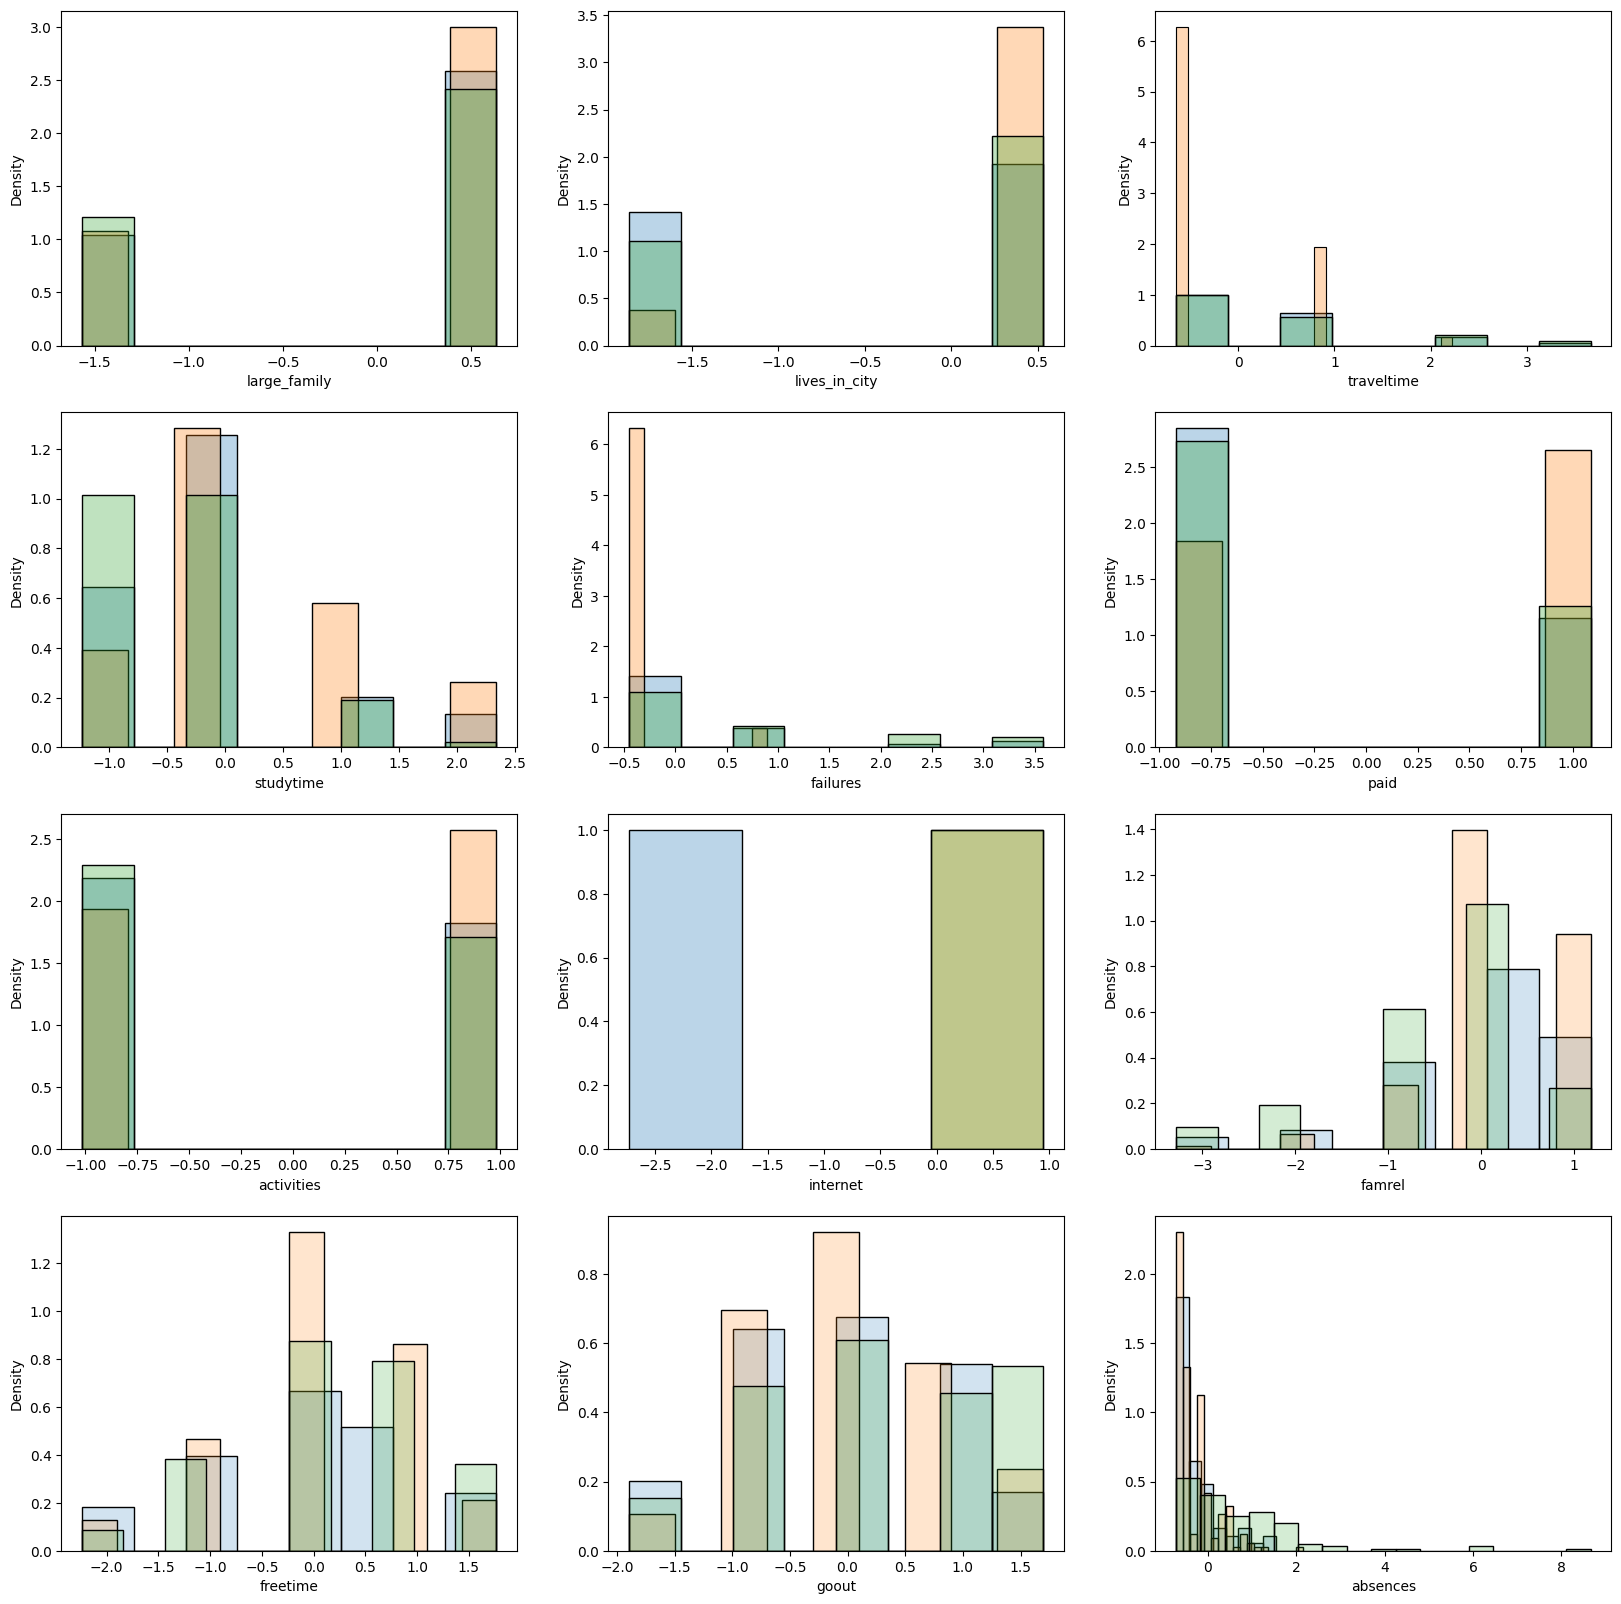

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(20,20))
for i in range(3):
    sns.histplot(x=X_grouped.get_group(i)['large_family'], alpha=0.3, stat="density", ax=axs[0][0])
    sns.histplot(x=X_grouped.get_group(i)['lives_in_city'], alpha=0.3, stat="density", ax=axs[0][1])
    sns.histplot(x=X_grouped.get_group(i)['traveltime'], alpha=0.3, stat="density", ax=axs[0][2])
    sns.histplot(x=X_grouped.get_group(i)['studytime'], alpha=0.3, stat="density", ax=axs[1][0])
    sns.histplot(x=X_grouped.get_group(i)['failures'], alpha=0.3, stat="density", ax=axs[1][1])
    sns.histplot(x=X_grouped.get_group(i)['paid'], alpha=0.3, stat="density", ax=axs[1][2])
    sns.histplot(x=X_grouped.get_group(i)['activities'], alpha=0.3, stat="density", ax=axs[2][0])
    sns.histplot(x=X_grouped.get_group(i)['internet'], alpha=0.3, stat="density", ax=axs[2][1])
    sns.histplot(x=X_grouped.get_group(i)['famrel'], alpha=0.2, stat="density", ax=axs[2][2])
    sns.histplot(x=X_grouped.get_group(i)['freetime'], alpha=0.2, stat="density", ax=axs[3][0])
    sns.histplot(x=X_grouped.get_group(i)['goout'], alpha=0.2, stat="density", ax=axs[3][1])
    sns.histplot(x=X_grouped.get_group(i)['absences'], alpha=0.2, stat="density", ax=axs[3][2])

<Axes: xlabel='goout', ylabel='failures'>

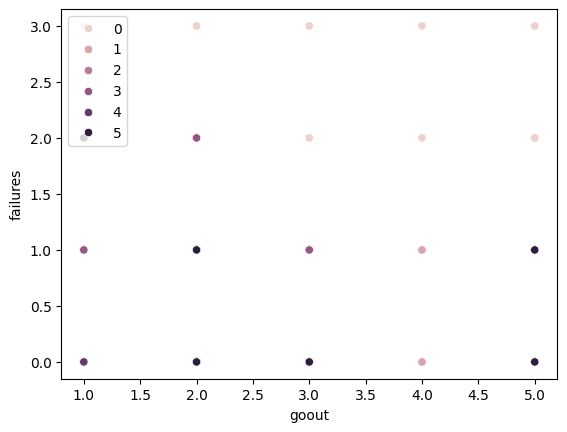

In [ ]:
#sns.scatterplot(data=X_raw, x='absences', y='goout', hue=preds)
#sns.scatterplot(data=X_raw, x='absences', y='failures', hue=preds)
sns.scatterplot(data=X_raw, x='goout', y='failures', hue=preds)

In [ ]:
from sklearn.cluster import DBSCAN, OPTICS

#model = DBSCAN(eps=3, min_samples=5)
model = OPTICS(min_samples=2)
model.fit(X)

/home/provolone/.local/lib/python3.10/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS(min_samples=2)

In [ ]:
print(np.unique(model.labels_))

[0 1 2 3 4 5]


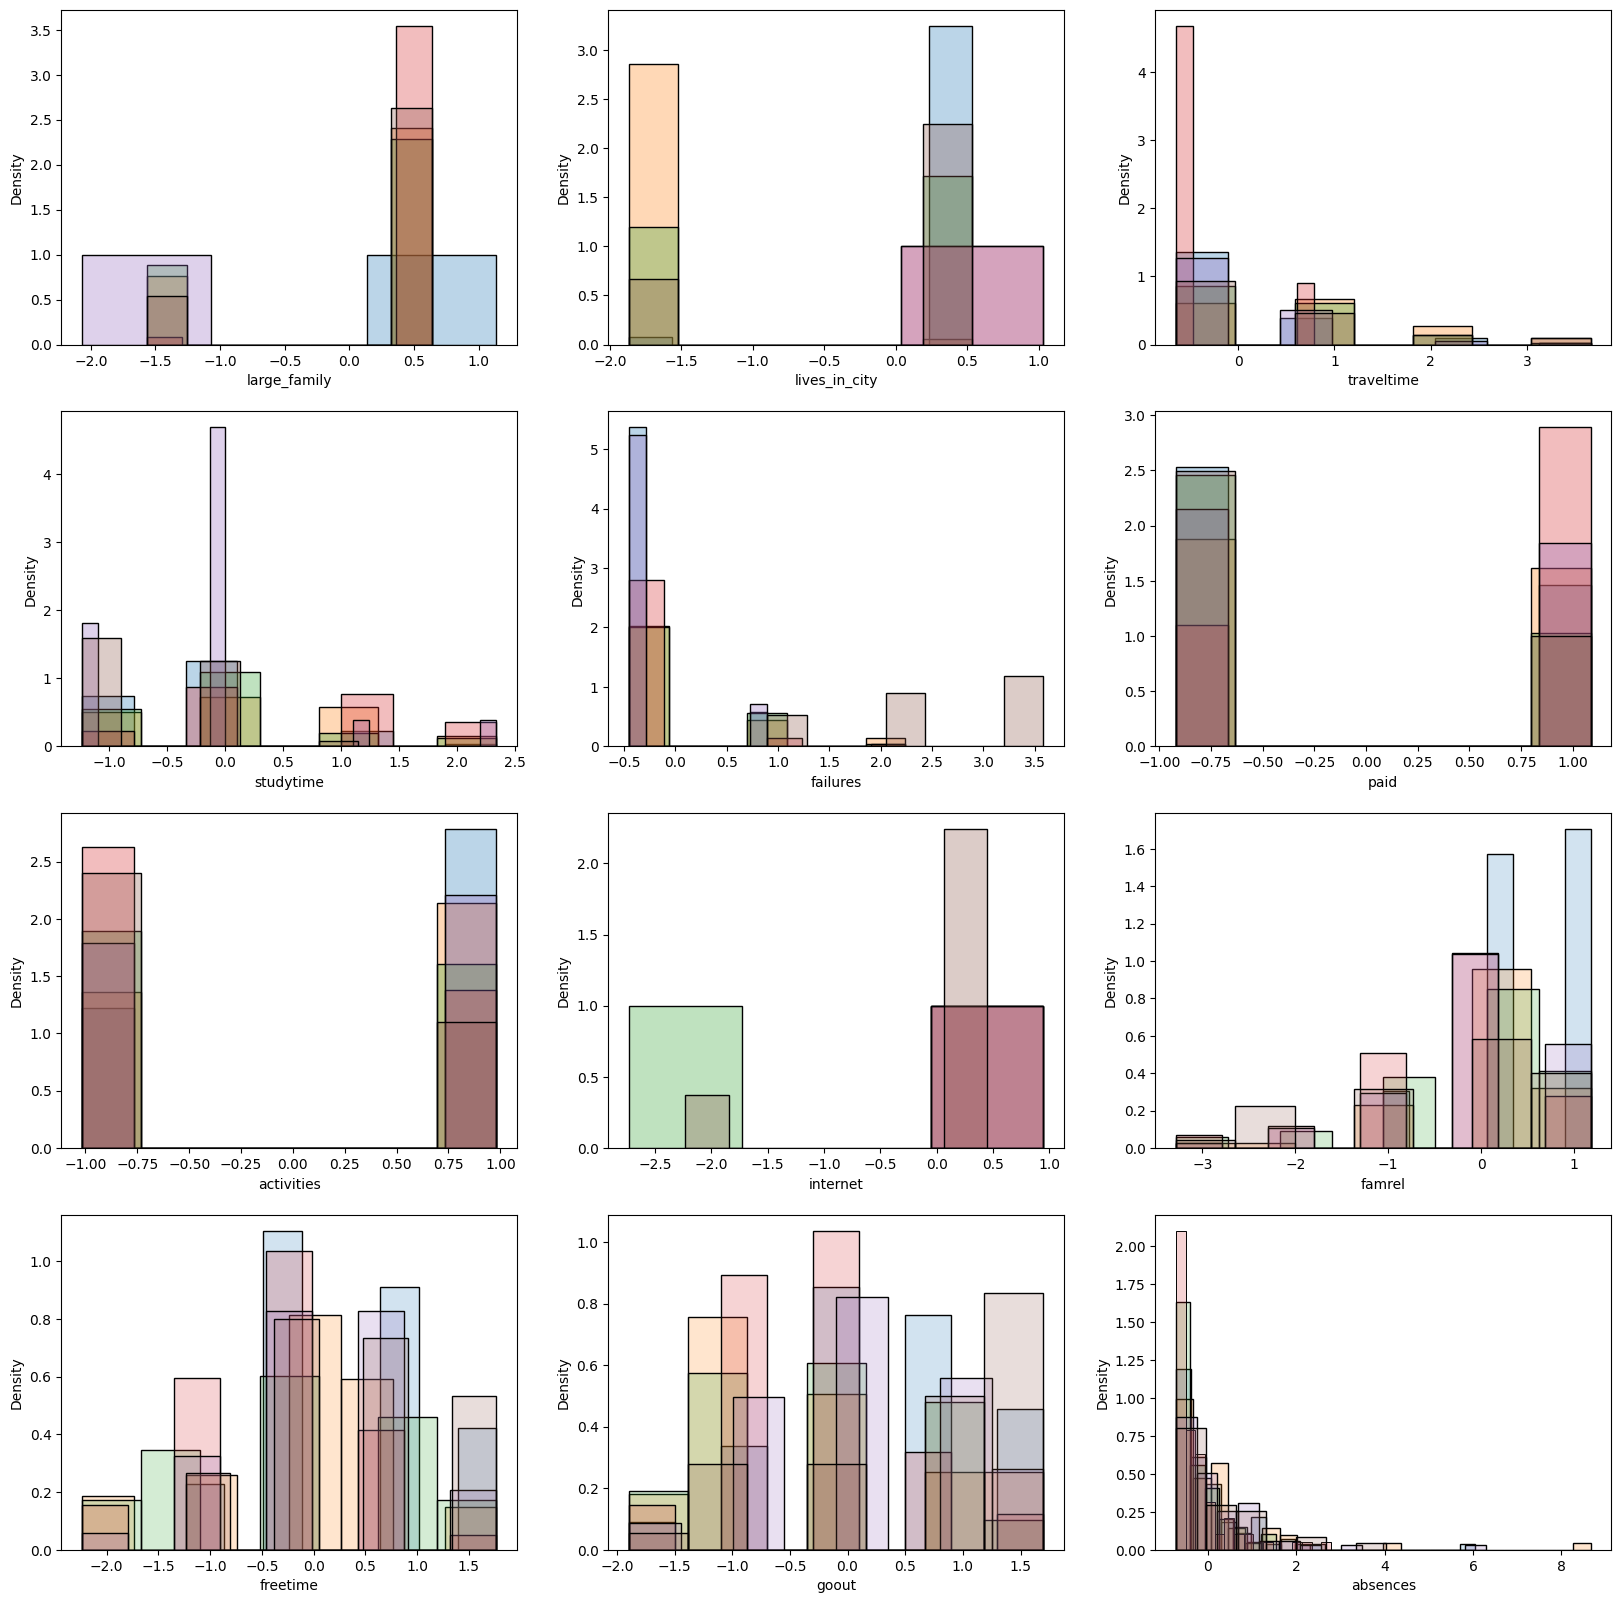

In [ ]:
X_grouped = X.groupby(model.labels_)
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(20,20))
for i in np.unique(model.labels_):
    sns.histplot(x=X_grouped.get_group(i)['large_family'], alpha=0.3, stat="density", ax=axs[0][0])
    sns.histplot(x=X_grouped.get_group(i)['lives_in_city'], alpha=0.3, stat="density", ax=axs[0][1])
    sns.histplot(x=X_grouped.get_group(i)['traveltime'], alpha=0.3, stat="density", ax=axs[0][2])
    sns.histplot(x=X_grouped.get_group(i)['studytime'], alpha=0.3, stat="density", ax=axs[1][0])
    sns.histplot(x=X_grouped.get_group(i)['failures'], alpha=0.3, stat="density", ax=axs[1][1])
    sns.histplot(x=X_grouped.get_group(i)['paid'], alpha=0.3, stat="density", ax=axs[1][2])
    sns.histplot(x=X_grouped.get_group(i)['activities'], alpha=0.3, stat="density", ax=axs[2][0])
    sns.histplot(x=X_grouped.get_group(i)['internet'], alpha=0.3, stat="density", ax=axs[2][1])
    sns.histplot(x=X_grouped.get_group(i)['famrel'], alpha=0.2, stat="density", ax=axs[2][2])
    sns.histplot(x=X_grouped.get_group(i)['freetime'], alpha=0.2, stat="density", ax=axs[3][0])
    sns.histplot(x=X_grouped.get_group(i)['goout'], alpha=0.2, stat="density", ax=axs[3][1])
    sns.histplot(x=X_grouped.get_group(i)['absences'], alpha=0.2, stat="density", ax=axs[3][2])